# Linear Regression Algorithm

## Summary
 * Split data (train/test or CV).
 * Fit OLS (optionally Ridge/Lasso/ElasticNet).
 * Report R2, RMSE/MAE on test set.
 * Inspect residuals: mean ≈0 (train), histogram/KDE, residuals vs fitted, Q–Q.
 * Check multicollinearity: VIF (<4–5 is fine).
 * Probe outliers/influence; consider interactions/nonlinearity if patterns remain.

In [3]:
! pip install pandas numpy matplotlib seaborn scikit-learn

  Using cached pandas-2.3.2-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (91 kB)
  Using cached matplotlib-3.10.6-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 527.7 kB/s  0:00:22m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 634.1 kB/s  0:00:13 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 648.0 kB/s  0:00:14 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 750.3 kB/s  0:00:06 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 646.2 kB/s  0:00:02 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 605.6 kB/s  0:00:58m0:00:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14/14 [seaborn]3/14 [seaborn]ib]n]


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as ms
from sklearn.linear_model import LinearRegression
%matplotlib inline

## 1. Dataset

* Data source: Advertising.csv
    * Features (inputs): TV, radio, newspaper (advertising budgets in thousands of dollars).
    * Target (output): sales (product sales in thousands of units).
* Purpose: We want to build a model that can predict sales based on how much is spent on different types of advertising.

In [6]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [7]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Input : TV, radio, newspaper
Output : sales

In [8]:
X = df.drop(columns=["sales"])
y = df['sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [9]:
df.shape

(200, 4)

## 2. Sampling / Data Splitting
In ML, we never train and evaluate on the same data.
The Code Uses :
* Training set (70 %) → used to fit the model.
* Test set (30 %) → kept aside to evaluate final model performance.
* random_state=4 ensures reproducibility.

In [10]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, random_state=4 ,test_size=0.3)
X_train.shape, X_test.shape

((140, 3), (60, 3))

## 3. Training the ML Model
* The training data goes through Linear Regression, a supervised learning algorithm:
    * The algorithm finds the best-fit coefficients `(lr.coef_)` and an intercept `(lr.intercept_)` to minimize the Mean Squared Error on training data.
* This produces a trained ML model, i.e., a mathematical equation:
    * ``` sales ≈ β0 + β1·TV + β2·radio + β3·newspaper ```

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
lr.coef_

array([0.04533392, 0.17715767, 0.00553852])

In [13]:
lr.intercept_

np.float64(3.0906443641251116)

In [14]:
X_test[:5]

,TV,radio,newspaper
12,214.7,24.0,4.0
100,135.2,41.7,45.9
129,220.3,49.0,3.2
176,276.9,48.9,41.8
2,44.5,39.3,45.1


## 4. Prediction
With the trained model, you make predictions on unseen test data:
* Inputs: the advertising budgets in X_test.
* Outputs: predicted sales y_pred_test.
This step checks how well the model generalizes beyond the training examples.

In [15]:
y_pred_test = lr.predict(X_test)

In [16]:
y_pred_test

array([17.09777441, 16.86148273, 21.7761552 , 24.53812602, 12.32008724,
       20.9083371 , 10.09857022, 12.38326275, 12.01767713, 16.939182  ,
       22.8039863 , 15.18438755,  8.45988902, 14.86958246, 18.5360064 ,
       18.5391287 , 18.67614759, 14.5131948 ,  9.74192603, 20.57441729,
       14.89243548, 17.70102466, 23.04193509,  7.718106  , 21.42075683,
       19.62792915, 13.79733409, 11.63827129, 18.42655599, 12.19463761,
       11.40777433,  9.96083851, 13.49436555, 15.18912412, 18.09830593,
        6.92815403, 14.21050378, 14.27217178, 14.10451207, 10.77723418,
       14.82936609, 11.96507878, 10.69651541, 10.40851022,  6.21159776,
       16.82112487, 16.4659736 , 12.07626636, 10.75281419, 20.84690688,
       15.09266208, 15.39499668, 13.27964587, 14.1081843 , 12.38574411,
        9.03289588, 20.48246311,  9.3517132 ,  5.36311192,  8.24848891])

## Evaluation
* MSE (Mean Squared Error) – average of squared prediction errors.
* RMSE (Root Mean Squared Error) – interpretable in the same units as sales.
* MAE (Mean Absolute Error) – average of absolute prediction errors.
* R² score – fraction of variance in sales explained by the model (1.0 is perfect fit).
These metrics show how closely predictions match actual sales.

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

In [18]:
print(f"MSE is {mean_squared_error(y_test, y_pred_test)}")
print(f"RMSE is {root_mean_squared_error(y_test, y_pred_test)}")
print(f"MAE is {mean_absolute_error(y_test, y_pred_test)}")

MSE is 2.2237746679115578
RMSE is 1.4912326002041256
MAE is 1.2111525124980485


### R2 Score
How much variance can be explained by the given feature

In [19]:
print(f"R2-score is {r2_score(y_test, y_pred_test)}")

R2-score is 0.9127220729596172


```vbnet
Dataset
   │
   ├─► Sampling → Training Set ─► Train ML Model ─► Trained Model
   │                                 │
   │                                 ▼
   │                         Prediction on Test Set
   │                                 │
   └─► Test Set ─────────────────────┘
                                      │
                                      ▼
                             Evaluation (MSE, RMSE, MAE, R²)
```

## Regularization

### Why Regularization?
Linear regression tries to find coefficients (weights) that minimize error on training data.
* **Problem:** If features are highly correlated or you have many of them, coefficients can grow very large (overfitting).
* **Solution:** Regularization adds a penalty on large coefficients so the model is simpler and generalizes better.
Mathematically, we modify the cost (loss) function:
```
Ordinary Least Squares (OLS):
   Minimize   Σ(y - ŷ)²

Regularized Regression:
   Minimize   Σ(y - ŷ)² + penalty( coefficients )
```
Different penalties → different regularization methods.

## L1 (Lasso) Regularization

L1 (Lasso) Regularization

Idea
Add a penalty proportional to the absolute value of coefficients:
$$ \min_{w} \left[ \sum_{i=1}^{n} \bigl(y_i - \hat{y}_i \bigr)^2 + \alpha \sum_{j=1}^{p} \lvert w_j \rvert \right] $$
* α (alpha) controls strength of penalty.
* Encourages some coefficients to shrink to exactly zero → feature selection.
* Effect
    * Sparsity: keeps only the most important features.
    * Good when you suspect only a few predictors are truly relevant.

In [20]:
from sklearn.linear_model import Lasso
las = Lasso()
las.fit(X_train, y_train)
y_pred_test = las.predict(X_test)
print(f"R2 score is {r2_score(y_test, y_pred_test)}")

R2 score is 0.9112250903194142


## L2 (Ridge) Regularization

Add a penalty proportional to the square of the coefficients:
* Coefficients are shrunk towards zero, but usually not exactly zero.
* Handles multicollinearity well.
    * $$ \min_{w} \left[ \sum_{i=1}^{n} \bigl(y_i - \hat{y}_i \bigr)^2 + \alpha \sum_{j=1}^{p} w_j^2 \right] $$
* Effect: All features remain in the model, but their influence is reduced.

In [21]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_test = ridge.predict(X_test)
print(f"R2 score is {r2_score(y_test, y_pred_test)}")

R2 score is 0.9127183051915455


## ElasticNet Regularization (L1+L2)
Combine Lasso and Ridge penalties:
$$
\min_{w} \left[ \sum_{i=1}^{n} \bigl(y_i - \hat{y}_i \bigr)^2
   + \alpha \Bigl( \rho \sum_{j=1}^{p} \lvert w_j \rvert
   + (1 - \rho) \sum_{j=1}^{p} w_j^2 \Bigr) \right]
$$
Effect
* Keeps model balanced:
    * Can zero-out some coefficients (L1 effect).
    * Shrinks remaining ones smoothly (L2 effect).
* Works well when you have many correlated features.

In [22]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)
y_pred_test = elasticnet.predict(X_test)
print(f"R2 score is {r2_score(y_test, y_pred_test)}")

R2 score is 0.9117469302155123


## Assumption of the Linear Relationship

### Linear relationship (pairplot)
* What it shows: Simple (bivariate) relationships between each feature and sales.
* Your observations match typical patterns on this dataset:
    * TV vs sales: points roughly align along an upward line → clear linear trend.
    * radio vs sales: still upward but more scatter → weaker linear trend.
    * newspaper vs sales: diffuse cloud → little/no linear trend.
* Caveat: Pairplots are bivariate; a feature that looks weak alone can still help in combination with others (interactions, shared variance).

In [23]:
## Linear Relationship between the feature and the target
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


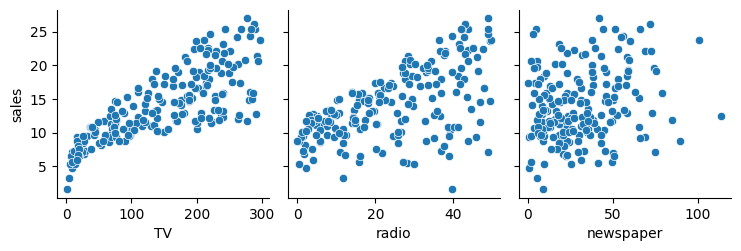

In [24]:
import seaborn as sns
sns.pairplot(df, x_vars=['TV','radio','newspaper'], y_vars=['sales'])
plt.show()

## Correlation matrix (Pearson r)

* Interpretation: Strength and direction of linear association.
* `TV–sales ≈ 0.78   radio–sales ≈ 0.58   newspaper–sales ≈ 0.23`
    * TV has the strongest positive correlation with sales.
    * Radio is moderate.
    * Newspaper is weak.

Note: Correlation ≠ causation, and it’s still bivariate. In multiple regression, a feature with low marginal correlation can gain/lose importance when others are present.

In [25]:
corr = df.corr()
corr.head()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


## Residual mean (≈ 0)
* We computed: mean(residual) ≈ -0.0756 on the test set.
* In OLS with an intercept, the training residuals have mean exactly 0 (by construction).
* On the test set, the mean residual is not guaranteed to be zero; a small value (like −0.076 in units of sales) is normal and typically negligible.

### What are “errors” (residuals)?
In regression, a residual is the difference between what really happened and what your model predicted. It tells you how far off the prediction was for each test observation.
### Why plot their distribution?
We plot a histogram (optionally with a KDE curve) to see the overall pattern of these errors.
* For a well-behaved linear regression:
    * Centered at 0 : Predictions are not systematically too high or too low.
    * Symmetric, bell-shaped : Errors are equally likely to be positive or negative of a given size.
    * No long tails or spikes : No unusually large misses (outliers) and variance is constant.
    * A classic “good” histogram looks like a normal (Gaussian) bell curve centered at 0.

In [26]:
# mean residuals = 0
residual = (y_test - y_pred_test)
np.mean(residual)

np.float64(-0.07559702903921825)

## Distribution of errors (histogram + KDE)
We’re checking the normality of residuals. For linear regression:
* Prediction accuracy does not require normal residuals.
* Inference (valid t-tests, CIs) benefits from approximate normality.
* What to look for: bell shape, centered near 0, no heavy tails.
* Follow-ups (more rigorous): Q–Q plot for normality, and residuals vs fitted plot for homoscedasticity (constant variance). A “megaphone” shape suggests heteroscedasticity.

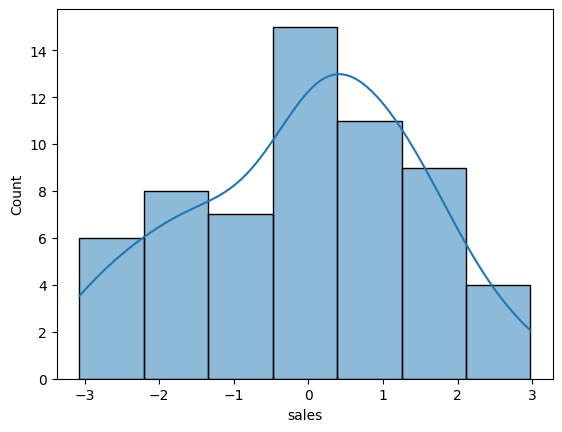

In [27]:
# Normal Distribution of error terms
sns.histplot(residual , kde=True)
plt.show()

## Multicollinearity (VIF)
* `TV ≈ 2.49, radio ≈ 3.29, newspaper ≈ 3.06`
* Interpretation: How much each coefficient’s variance is inflated by linear relationships with other features.
    * Common rules of thumb:
        * VIF > 5 (or > 10) often flagged as problematic.
        * Your chosen threshold 4 is simply a more conservative cutoff.
* Conclusion: All VIFs are below 4–5, so no serious multicollinearity here.
* Why it matters: High multicollinearity → unstable coefficients, large standard errors, counterintuitive signs. If it occurs, consider:
    * Removing/combining correlated features,
    * Ridge (L2) regularization,
    * PCA or domain-driven feature engineering.

In [30]:
! pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 11.1 MB/s  0:00:01eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]


In [31]:
def vif_score(X):
    X_arr = X.values
    vif = [variance_inflation_factor(X_arr,i) for i in range(X.shape[1])]
    vif_score = pd.DataFrame()
    vif_score['vif_score'] = vif
    vif_score['Features']= X.columns
    return vif_score

In [32]:
vif_score(X)

,vif_score,Features
0,2.486772,TV
1,3.285462,radio
2,3.055245,newspaper


* If Vif_score > 4 --> MultiColinearity in the dataset
* If Vif_score < 4 --> No MultiColinearity in the dataset